# Example toy analysis


In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
plt.rcParams.update({"font.size": 14})

## Load the data


In [3]:
data = pd.read_csv("data/data.csv")

Print the first few measurements to screen for human readability check

In [4]:
data.head()

,temperature_C,pressure_kPa
0,27.88,98.09
1,27.86,98.27
2,27.87,98.15
3,27.88,98.21
4,27.88,98.27


For analysis, load the observations into NumPy arrays

In [5]:
temperature = data["temperature_C"].to_numpy()
pressure = data["pressure_kPa"].to_numpy()

# Convert to SI units (but leave in kPa for nicer viewing)
temperature = temperature + 273.15  # Kelvin

## Visualize the data


Before attempting to model the data, attempt to visualize it first

In [6]:
Path("plots").mkdir(parents=True, exist_ok=True)

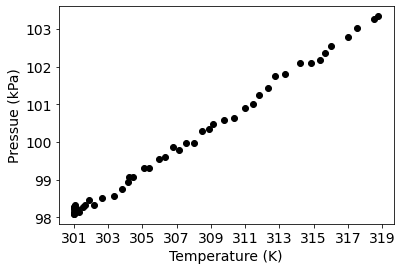

In [7]:
fig, axes = plt.subplots()
axes.scatter(temperature, pressure, label="data", marker="o", color="black")

axes.set_xticks(np.arange(int(min(temperature)), int(max(temperature) + 3), 2))
axes.set_xlabel("Temperature (K)")
axes.set_ylabel("Pressue (kPa)")

fig.savefig("plots/scatter.pdf")

From the scatter plot of Temperature vs. Pressure it is clear that some form of linear relationship exists. The goal is now to model this behaviour analytically.

## Model the data and perform statistical inference


It is clear that the data exhibit some linear relationship and so should be modeled with a linear model,

$$
f\left(x\right) = a x + b\,.
$$

Ignoring that we can use physics knowledge to guide us, we will use only the model and the data. We can now infer the model parameters $a$ and $b$.

This can be done by performing a fit of an analytical model to the obsreved data. In order to determine what parameters of the model provide the "best fit" to the data, an objective function of the deviation between the model and the data is minimized. There are many choices of what objective function (also know as a "cost", "goal", or "loss" function) is desireable based on what anlaysis is being done. However, for this simple toy example it is fine to use a "least-squares" linear regresssion &mdash; which minimizes the square of the "distance" between the model prediction and the observed data.

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(temperature, pressure)

In [9]:
print("Model Parameters:")
print(f"\t slope (a): {slope:0.3f} kPa/K")
print(f"\t intercept (b): {intercept:0.3f} K")

Model Parameters:
	 slope (a): 0.293 kPa/K
	 intercept (b): 10.042 K


In [10]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

## Visualize the model predictions


In [11]:
model_pressure = linear_model(temperature, slope, intercept)

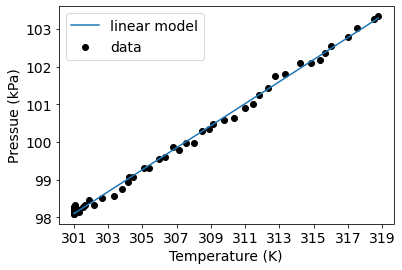

In [12]:
fig, axes = plt.subplots()
axes.scatter(temperature, pressure, label="data", marker="o", color="black")
axes.plot(temperature, model_pressure, label="linear model")

axes.set_xticks(np.arange(int(min(temperature)), int(max(temperature) + 3), 2))
axes.set_xlabel("Temperature (K)")
axes.set_ylabel("Pressue (kPa)")
axes.legend(loc="best")

fig.savefig("plots/best_fit_model.pdf")